In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from warnings import filterwarnings

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x:'%.2f' % x)

## Text Pre-Processing

In [2]:
df = pd.read_csv('wiki_data.csv', index_col=0)
df.head()

,text
1,Anovo\n\nAnovo (formerly A Novo) is a computer...
2,Battery indicator\n\nA battery indicator (also...
3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
4,CAVNET\n\nCAVNET was a secure military forum w...
5,CLidar\n\nThe CLidar is a scientific instrumen...


In [3]:
df.shape

(10859, 1)

In [4]:
df= df[:2000]
df.shape

(2000, 1)

In [5]:
def clean_text(text):
    # Normalizing Case Folding
    text = text.str.lower()
    
    # Punctuations
    text = text.str.replace('[^\w\s]', ' ', regex=True)
    text = text.str.replace("\n", " ", regex=True)

    # Numbers
    text = text.str.replace('\d', ' ', regex=True)
    return text

In [6]:
df['text'] = clean_text(df['text'])
df.head()

,text
1,anovo anovo formerly a novo is a computer s...
2,battery indicator a battery indicator also k...
3,bob pease robert allen pease august ...
4,cavnet cavnet was a secure military forum whi...
5,clidar the clidar is a scientific instrument ...


In [7]:
# removing stopwords
def remove_stopwords(text):
    stop_words = stopwords.words('English')
    text = text.apply(lambda x: ' '.join( x for x in str(x).split() if x not in stop_words))
    return text

In [8]:
df['text'] = remove_stopwords(df['text'])

In [9]:
df.head()

,text
1,anovo anovo formerly novo computer services co...
2,battery indicator battery indicator also known...
3,bob pease robert allen pease august â â june a...
4,cavnet cavnet secure military forum became ope...
5,clidar clidar scientific instrument used measu...


In [10]:
# removing rare words
rare_words = pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]
df['text'] = df['text'].apply(lambda x: ' '.join( x for x in x.split() if x not in rare_words))

## Tokenization

In [11]:
df['text'].apply(lambda x: TextBlob(x).words)

1       [anovo, anovo, formerly, novo, computer, servi...
2       [battery, indicator, battery, indicator, also,...
3       [bob, pease, robert, allen, pease, august, â, ...
4       [cavnet, cavnet, secure, military, forum, beca...
5       [clidar, clidar, scientific, instrument, used,...
                              ...                        
1996    [edinburgh, calotype, club, edinburgh, calotyp...
1997    [endrin, endrin, organochloride, chemical, for...
1998    [ethylene, glycol, dinitrate, ethylene, glycol...
1999    [forges, de, syam, forges, de, syam, syam, for...
2000    [frank, kamenetskii, theory, combustion, frank...
Name: text, Length: 2000, dtype: object

## Lemmatization

In [12]:
df['text'] = df['text'].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))

In [13]:
df.head()

,text
1,anovo anovo formerly novo computer service com...
2,battery indicator battery indicator also known...
3,bob pea robert allen pea august â â june analo...
4,cavnet cavnet secure military forum became ope...
5,clidar clidar scientific instrument used measu...


## Visualization

In [14]:
# Let's calculate the frequencies of the terms in the texts.

tf = df['text'].apply(lambda x: pd.value_counts(x.split())).sum(axis=0).reset_index()

In [15]:
tf.head()

,index,0
0,anovo,2.00
1,service,1449.00
2,company,2511.00
3,rating,109.00
4,giving,109.00


In [16]:
tf.columns = ['words', 'tf']

### Bar Plot

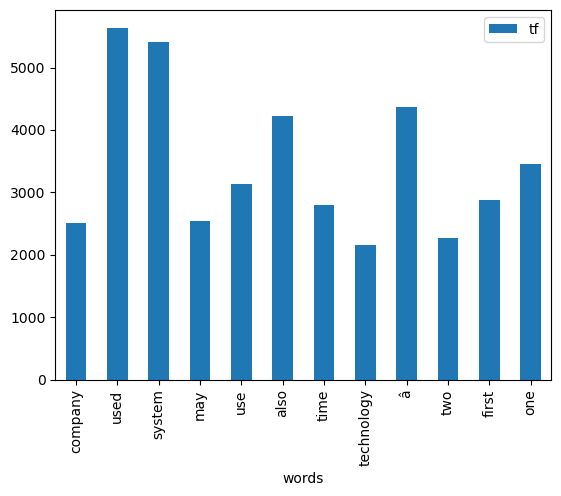

In [17]:
tf[tf['tf'] > 2000].plot.bar(x="words", y="tf")
plt.show()

### Word Cloud

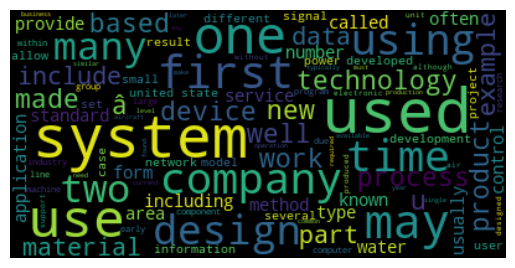

In [18]:
text = " ".join(i for i in df['text'])
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100,
                      background_color='black').generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
# Let's write all the stages as a single function.

df = pd.read_csv('wiki_data.csv', index_col=0)

def wiki_preprocess(text, Barplot=False, WordCloud=False):
    """
    It performs pre-processing operations on texts.

    params:

    text: Text variable in dataframe
    Barplot: Barplot visualization
    WordCloud: WordCloud Visualization


    return: text


    Example: 
       wiki_preprocess(dataframe[col_name])
    
    """
    # Normalizing Case Folding
    text = text.str.lower()
    
    # Punctuations
    text = text.str.replace('[^\w\s]', ' ', regex=True)
    text = text.str.replace("\n", " ", regex=True)

    # Numbers
    text = text.str.replace('\d', ' ', regex=True)

    # Stopwords
    stop_words = stopwords.words('English')
    text = text.apply(lambda x: ' '.join( x for x in str(x).split() if x not in stop_words))

    # Rare Words/ Custom Words
    rare_words = pd.Series(' '.join(text).split()).value_counts()[-1000:]
    text = text.apply(lambda x: ' '.join( x for x in x.split() if x not in rare_words))


    if Barplot:
        # Calculation of term frequencies
        tf = text.apply(lambda x: pd.value_counts(x.split())).sum(axis=0).reset_index()
    
        # Naming the columns
        tf.columns = ['words', 'tf']

       # Barplot Visualization
        tf[tf['tf'] > 2000].plot.bar(x="words", y="tf")
        plt.show()

    if WordCloud:
      # combining the words
       text = " ".join(i for i in text)

       # WordCloud Visualization
       wordcloud = WordCloud(max_font_size=50, 
                      max_words=100,
                      background_color='black').generate(text)

       plt.figure()
       plt.imshow(wordcloud, interpolation="bilinear")
       plt.axis("off")
       plt.show()

    return text
        

In [ ]:
 # wiki_preprocess(df['text'], True, True)